In [1]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from keras import models

model = load_model('A2A_Final.h5')
print(model.summary())  

Using TensorFlow backend.
C:\Users\dahyun\Anaconda3\envs\dip\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\dahyun\Anaconda3\envs\dip\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\dahyun\Anaconda3\envs\dip\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\dahyun\Anaconda3\env

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18, 18, 64)       

In [2]:
img_path = 'image.jpg'
from tensorflow.python.keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size = (24, 24), color_mode='grayscale')
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0) # 향후 모델 인풋에서 배치차원을 위해 차원 늘려줌
img_tensor /= 255.

<h3>1. CNN과 max pooling 층에서 나오는 특성 맵을 그리는 법


In [3]:
layer_outputs = [layer.output for layer in model.layers[:7]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)#각 activations의 출력 저장

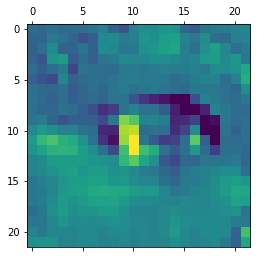

In [4]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]

import matplotlib.pyplot as plt
%matplotlib inline

plt.matshow(first_layer_activation[0, :, :, 2], cmap = 'viridis')

# print(first_layer_activation.shape)

C:\Users\dahyun\Anaconda3\envs\dip\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


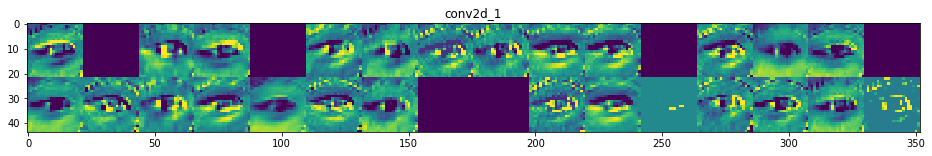

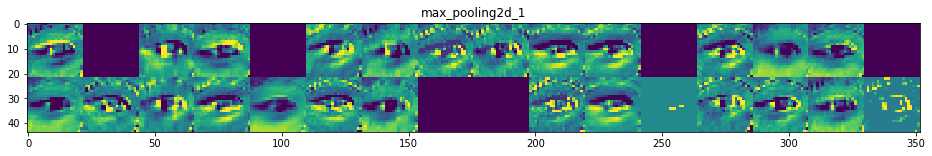

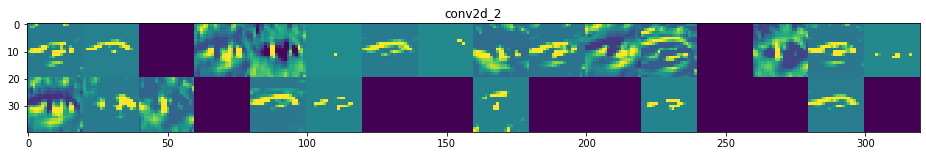

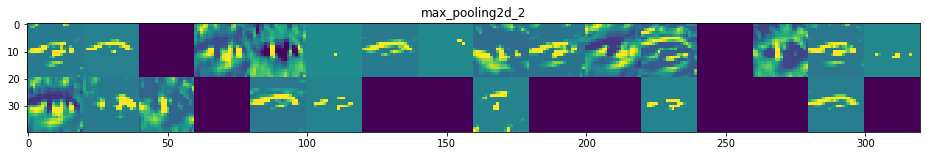

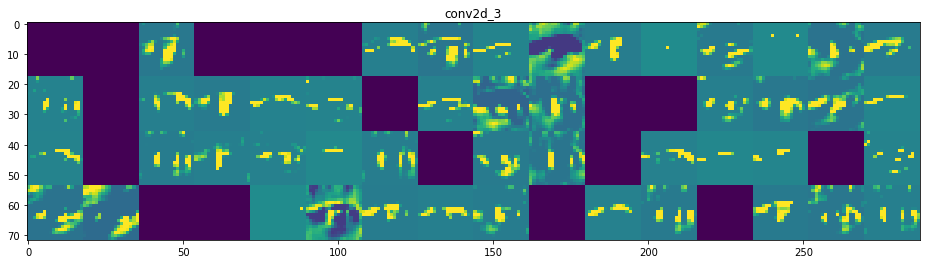

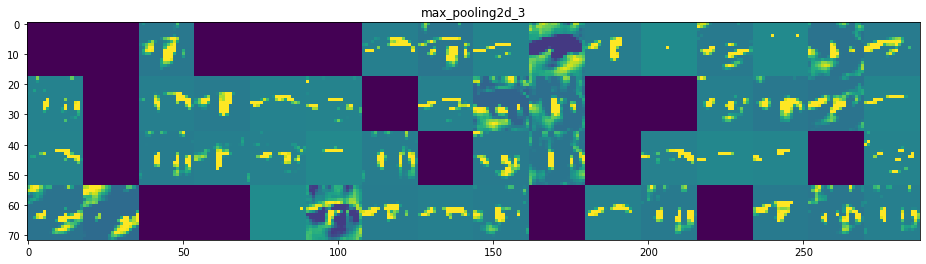

In [5]:
#- 모든 활성화에 있는 채널 시각화하기 : 논문에서 많이 보신 그림들이 어떻게 나오는 것인가 감을 잡을 수 있을 것입니다.
import keras
# 층의 이름을 그래프 제목으로
layer_names = []
for layer in model.layers[:6]:
    layer_names.append(layer.name)

images_per_row = 16

# 여기서부터가 특징맵 출력하는 부분입니다.
for layer_name, layer_activation in zip(layer_names, activations):
    # 특징의 수를 뜻합니다.
    # 정확히 각 특징의 채널의 수라고 표현하면 이해가 쉽겠죠?
    n_features = layer_activation.shape[-1]

    # 특징맵의 크기는 (1, size, size, n_features)입니다., 1은 batch_size
    # layer_activation.shape[1]이 이미지의 width, height거든요.
    size = layer_activation.shape[1]

    # 활성화를 보여주기위한 grid를 정의합니다. 
    n_cols = n_features // images_per_row # 열의 갯수를 16개의 단위로 보여주고 싶어서입니다.
                                           #첫번째 층은 32개니 2개의 row로 나타나겟죠?
        
    #이미지가 들어가야할 픽셀 갯수라고 생각하시면 됩니다.
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # 각 활성화를 채우는 부분.
    # 특성맵 갯수에 따른 행의 길이 : n_cols
    for col in range(n_cols):
        # 16개씩 채우면서.
        for row in range(images_per_row):
            # 모든 채널을 사용하겠다.
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # 픽셀로 표현하기 위해.
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            # np.clip은 relu같은 느낌입니다. 0밑은 전부 0, 255 위는 전부 255로.
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

In [7]:
img_tensor.shape

(1, 24, 24, 1)

In [8]:
layer_names = []
for layer in model.layers[:5]:
    layer_names.append(layer.name)

In [9]:
print(layer_names)

['conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3']


In [10]:
images_per_row = 16

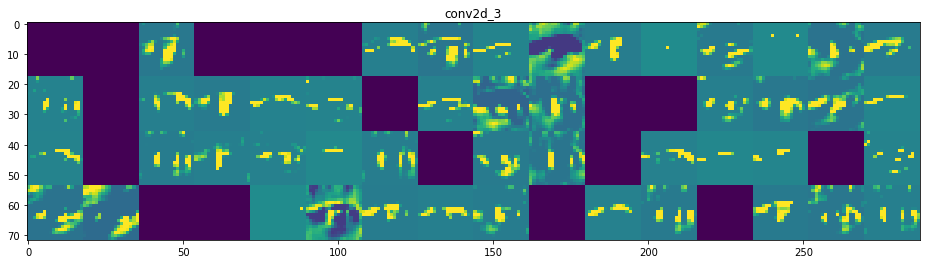

In [11]:
for layer_name, layer_activation in zip(layer_names, activations):   #layer names와 activations에 각각의 층마다의 깂을 저장

    n_features = layer_activation.shape[-1]  #feature의 개수를 추출하여 저장 ->actication
    size = layer_activation.shape[1]         #영상의 크기 저장

    n_cols = n_features // images_per_row    #몫을 저장
    display_grid = np.zeros((size * n_cols, images_per_row * size))    #영상의 픽셀 사이즈  size*col-> 가로  row*size->세로

for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]#추출하여 저장
            channel_image -= channel_image.mean()      
            channel_image /= channel_image.std()
            channel_image *= 64   #variation 일정하게->histogram equalization과 비슷
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

scale = 1. / size 
plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()

<h3>2.필터가 반응하는 시각적 패턴

In [12]:
from keras import backend as K

model = model

layer_name = 'conv2d_3'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

# 입력에 대한 손실의 그래디언트 구하기
grads = K.gradients(loss, model.input)[0]

# 그래디언트 정규화 ( 경사 상승법 과정을 부드럽게 하기 위하여 사용 )
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5) # 1e-5는 0 나눗셈 방지, 이를 gradient-clipping 이라고 함.

# 손실값과 그래디언트 값을 얻기 위함.
# 주어진 입력 이미지에 대해 손실 텐서와 그래디언트 텐서를 계산한다. 
iterate = K.function([model.input], [loss, grads])

import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 24, 24, 1))])

# 확률적 경사 상승법을 사용한 손실 최대화하기
input_img_data = np.random.random((1, 24, 24, 1)) * 20 + 128.

step = 1.
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step 


In [13]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x, 0, 1)
    
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [16]:
def generate_pattern(layer_name, filter_index, size = 24):
    # 주어진 층과 필터의 활성화를 최대화 하기위한 loss 정의
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    grads = K.gradients(loss, model.input)[0]
    
    # grad clipping
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    # 입력 이미지에 대한 손실과 그래디언트 반환
    iterate = K.function([model.input], [loss, grads])
    # 회색이미지로 시작
    input_img_data = np.random.random((1, size, size, 1)) * 20 + 128.
    
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

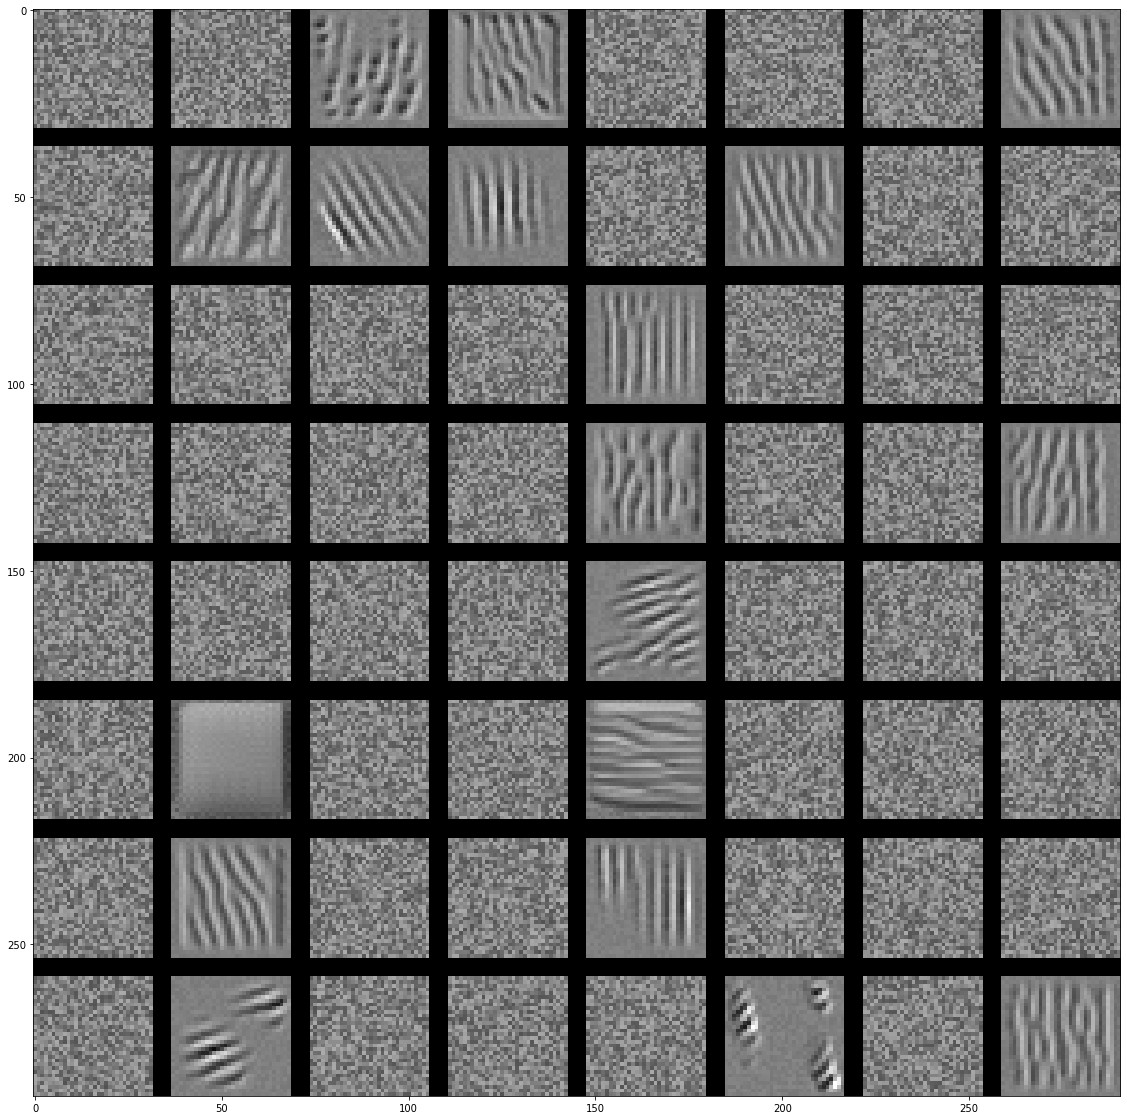

In [15]:
layer_name = 'conv2d_3'
size = 32
margin = 5

# 결과를 담은 빈 검은 이미지
results = np.zeros((8 * size + 7 * margin , 8 * size + 7 * margin, 3), dtype='uint8')

for i in range(8):
    for j in range(8):
        # layer_name에 있는 i + (j*8) 번째 필터에 대한 패턴 생성
        filter_img = generate_pattern(layer_name, i + (j * 8), size = size)
        
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start:horizontal_end, vertical_start: vertical_end, :] = filter_img
        
plt.figure(figsize=(20, 20))
plt.imshow(results)

<h3>3.원본 이미지에 heatmap을 그리는 방법

[1]
(1, 2)


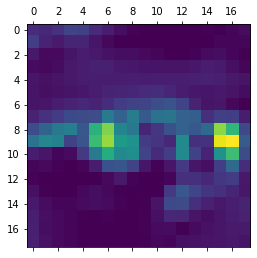

In [18]:
#각 레이어의 필터 특성 출력

from keras.applications import VGG16
from keras import backend as K
from keras.applications.vgg16 import preprocess_input, decode_predictions
import cv2

K.clear_session()
model = load_model('a2a_final.h5')

img_path = 'image.jpg'
img = image.load_img(img_path, target_size=(24, 24)) # 224 x 224 크기의 PIL 객체로 반환된다
x = image.img_to_array(img) # (224, 224, 3) 크기의 넘파이 float32 배열
x = np.expand_dims(x, axis=0) # 차원을 추가하여 (1, 224, 224, 3) 크기의 배치로 배열을 반환
x = preprocess_input(x) # 데이터 전처리 (채널별 컬러 정규화 수행)

img=cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
dst = cv2.resize(img, dsize=(24,24), interpolation=cv2.INTER_AREA)
dst.shape

dst=dst.reshape(1,24,24,1)
dst.shape

predict = model.predict_classes(dst)
print(predict)

preds = model.predict(dst)
print(preds.shape) # 제일 처음 3개를 가져와서 출력한다
# decode_predictions(preds, top=3) : ImageNet 데이터셋에 대한 예측 결과에서 3개의 최상위 항목을 반환한다

predict_output = model.output[:, np.argmax(preds[0])] # 예측 벡터에서 최대로 활성화된 항목(vault)의 클래스에서의 인덱스

last_conv_layer = model.get_layer('conv2d_3') # VGG16의 마지막 합성곱층의 특성맵
grads = K.gradients(predict_output, last_conv_layer.output)[0] 

pooled_grads = K.mean(grads, axis=(0, 1, 2)) # 전체의 average가 가장 높은 gradient를 갖는 필터 하나를 선택한다

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
grads = K.gradients(predict_output, last_conv_layer.output)[0]

pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([dst])

for i in range(32):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()